In [2]:
import spacy 
from spacy import displacy 

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
with open ("interview_2_labeled.txt", "r") as f:
    text = f.read()
print(text)

Interviewer: Hi, Asim, how are you?
Interviewee: I'm good. How are you?
Interviewer: Good? Good. So we are doing this informal, you know, interview series with a lot of international students, you know, who come to India, and especially to Pune, to understand their journey as to why they chose India as a destination for higher education. What attracted them to India? From which country are they representing? You know, so to understand their basic journey in our country here. So if you can let us know from which country, which country are you from, and what brought you to India?
Interviewee: Basically, my name is Yasin Adam, and I'm from Sudan. So my journey with India started in 2019 when I just decided that I want to go and pursue my engineering in India. And like, how I got to know Pune. I got to know Pune, to my friends. So, like, I had my friends who were here, so I got in touch with them. That's like, I'm coming to India to pursue my engineering. So, like, just tell me the procedu

In [5]:
doc = nlp(text)
print(doc)

Interviewer: Hi, Asim, how are you?
Interviewee: I'm good. How are you?
Interviewer: Good? Good. So we are doing this informal, you know, interview series with a lot of international students, you know, who come to India, and especially to Pune, to understand their journey as to why they chose India as a destination for higher education. What attracted them to India? From which country are they representing? You know, so to understand their basic journey in our country here. So if you can let us know from which country, which country are you from, and what brought you to India?
Interviewee: Basically, my name is Yasin Adam, and I'm from Sudan. So my journey with India started in 2019 when I just decided that I want to go and pursue my engineering in India. And like, how I got to know Pune. I got to know Pune, to my friends. So, like, I had my friends who were here, so I got in touch with them. That's like, I'm coming to India to pursue my engineering. So, like, just tell me the procedu

In [6]:
print(len(text))
print(len(doc))

10030
2489


In [7]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Asim PERSON
Interviewee ORG
India GPE
Pune LOC
India GPE
India GPE
India GPE
Interviewee ORG
Yasin Adam PERSON
Sudan GPE
India GPE
2019 DATE
India GPE
Pune LOC
Pune LOC
India GPE
first ORDINAL
English LANGUAGE
Interviewee GPE
India GPE
English LANGUAGE
Interviewee GPE
Sudan GPE
Interviewee GPE
Sudan GPE
Ethiopia GPE
Ethiopia GPE
India GPE
Interviewee ORG
seven hours TIME
Interviewee GPE
Bombay GPE
English LANGUAGE
Pune LOC
Interviewee ORG
Interviewee GPE
Bombay GPE
Interviewee GPE
Pune GPE
first ORDINAL
biryani PERSON
first ORDINAL
Interviewee GPE
first ORDINAL
India GPE
Indians NORP
Africans NORP
Interviewee GPE
India GPE
LTS ORG
English LANGUAGE
Interviewee GPE
Pune ORG
English LANGUAGE
four and a half months DATE
English LANGUAGE
Interviewee GPE
Interviewee GPE
first ORDINAL
first ORDINAL
first ORDINAL
Lavale GPE
Interviewee GPE
Institute of Technology ORG
fourth ORDINAL
my final year DATE
Interviewee ORG
Interviewee ORG
Interviewee GPE
Interviewee GPE
75% PERCENT
the University of.

In [8]:
filtered_sentence = " ".join([token.text for token in doc if not token.is_stop])
print(filtered_sentence)


Interviewer : Hi , Asim , ? 
 Interviewee : good . ? 
 Interviewer : Good ? Good . informal , know , interview series lot international students , know , come India , especially Pune , understand journey chose India destination higher education . attracted India ? country representing ? know , understand basic journey country . let know country , country , brought India ? 
 Interviewee : Basically , Yasin Adam , Sudan . journey India started 2019 decided want pursue engineering India . like , got know Pune . got know Pune , friends . , like , friends , got touch . like , coming India pursue engineering . , like , tell procedure . ? , like , , suggested come English course . 
 Interviewer : took admission , ... 
 Interviewee : came India , know English ? 
 Interviewee : Yes . Like , single word . 
 Interviewer : flight Sudan ? think direct flight . 
 Interviewee : , direct flight . Sudan , took flight Ethiopia , Ethiopia took flight India . 
 Interviewer : long journey ? 
 Interviewee :

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sjnil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

directory = 'C:/Users/sjnil/OneDrive/Desktop/NLP' 

def split_interview(text):
    interviewer_text = []
    interviewee_text = []
    
    lines = text.splitlines()
    
    for line in lines:
        if line.startswith("Interviewer:"):
            interviewer_text.append(line.replace("Interviewer:", "").strip())
        elif line.startswith("Interviewee:"):
            interviewee_text.append(line.replace("Interviewee:", "").strip())
    
    interviewer_text = " ".join(interviewer_text)
    interviewee_text = " ".join(interviewee_text)
    
    return interviewer_text, interviewee_text

results = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            interview_text = file.read()
            interviewer_text, interviewee_text = split_interview(interview_text)
            
            scores = sid.polarity_scores(interviewee_text)
            compound_score = scores['compound']

            results.append({
                "Filename": filename,
                "Compound Score": compound_score,
            })

df = pd.DataFrame(results)

output_path = 'interview_sentiment_analysis_vader.csv'
df.to_csv(output_path, index=False)

print(df)


                  Filename  Compound Score
0  interview_1_labeled.txt          0.9997
1  interview_2_labeled.txt          0.9999


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sjnil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
doc3 = nlp(interviewee_text)
for ent in doc3.ents:
    print(ent.text, ent.label_)

Yasin Adam PERSON
Sudan GPE
India GPE
2019 DATE
India GPE
Pune LOC
Pune LOC
India GPE
first ORDINAL
English LANGUAGE
India GPE
English LANGUAGE
Sudan GPE
Ethiopia GPE
Ethiopia GPE
India GPE
seven hours TIME
Pune GPE
first ORDINAL
biryani PERSON
first ORDINAL
first ORDINAL
India GPE
India GPE
LTS ORG
English LANGUAGE
Pune ORG
English LANGUAGE
four and a half months DATE
English LANGUAGE
first ORDINAL
first ORDINAL
first ORDINAL
Lavale GPE
75% PERCENT
the University of... ORG
three CARDINAL
two CARDINAL
first ORDINAL
English LANGUAGE
English LANGUAGE
English LANGUAGE
English LANGUAGE
three CARDINAL
three CARDINAL
three CARDINAL
first ORDINAL
homesick PERSON
India GPE


In [12]:
custom_stop_words = {"exactly", "Okay", "okay","yeah", "oh","actually", "Yeah", "lot", "came", "thing", "Yes", "yes", "so", "know", "got"}  


In [13]:
doc2 = nlp(interviewee_text)

filtered_text = " ".join([token.text for token in doc2 if not token.is_stop and not token.is_punct and token.text.lower() not in custom_stop_words])

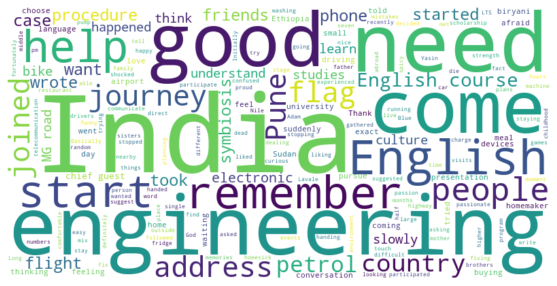

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.show()

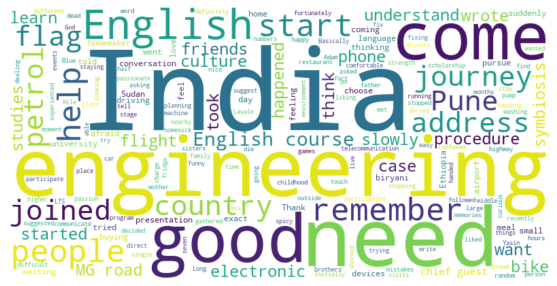

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.show()

In [16]:
sentence2 = "I don't remember exactly the chief guest, but like, I handed, like, I had such a proud feeling for you, and I was very happy, you know, like, I'm on the stage and like, everyone is looking at me and I'm handing, like, my country flag, yeah, the chief guest. It was really a moment to remember, yes."

scores = sid.polarity_scores(sentence2)

print(scores['compound'])  

0.9872


In [18]:
sentences = [
    "Yes, I was very shocked because it's my first time going abroad.",
    "The language was very different.",
    "My English was not that good.",
    "I wasn't able to communicate with English.",
    "It was very difficult for me.",
    "I was even afraid to start the conversation with anyone.",
    "I was very afraid to start any conversation with anyone."
]

for sentence in sentences:
    sentiment = sid.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}\n")

Sentence: Yes, I was very shocked because it's my first time going abroad.
Sentiment: {'neg': 0.181, 'neu': 0.63, 'pos': 0.189, 'compound': 0.0276}

Sentence: The language was very different.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: My English was not that good.
Sentiment: {'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.3412}

Sentence: I wasn't able to communicate with English.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: It was very difficult for me.
Sentiment: {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.4201}

Sentence: I was even afraid to start the conversation with anyone.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: I was very afraid to start any conversation with anyone.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



Average compount score = -0.74

In [20]:
india_keywords = ["India", "india", "Pune", "pune", "Maharashtra"]

food_sentences = [sent.text for sent in doc3.sents if any(keyword in sent.text.lower() for keyword in india_keywords)]

for sentence in food_sentences:
    print(f"Sentence: {sentence}")
    sentiment = sid.polarity_scores(sentence)
    print(f"Sentiment: {sentiment}")

Sentence: So my journey with India started in 2019 when I just decided that I want to go and pursue my engineering in India.
Sentiment: {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.0772}
Sentence: And like, how I got to know Pune.
Sentiment: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}
Sentence: I got to know Pune, to my friends.
Sentiment: {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}
Sentence: That's like, I'm coming to India to pursue my engineering.
Sentiment: {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
Sentence: Before you came to India, you didn't know English at all?
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence: So from Sudan, I took a flight to Ethiopia, and from Ethiopia I took a flight to India.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence: You know, I went out and, like, we all met, and we all came together here to Pune.
Sentiment: {'neg': 0.0, 'neu': 0.865, 'p

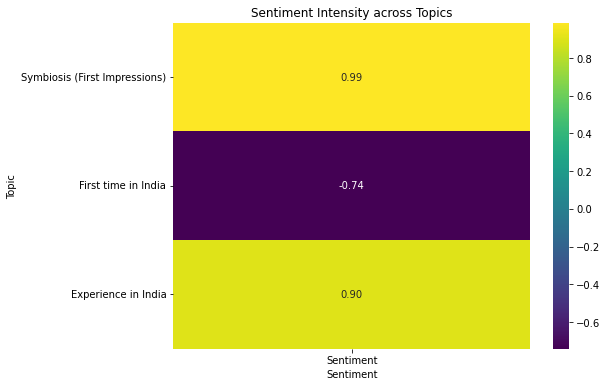

In [21]:
import seaborn as sns

topics = ["Symbiosis (First Impressions)", "First time in India", "Experience in India"]
sentiment_score = [0.9872, -0.7413, 0.9041]

df = pd.DataFrame({'Topic': topics, 'Sentiment': sentiment_score})

heatmap_data = df.set_index('Topic')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar=True)

plt.title('Sentiment Intensity across Topics')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()